# SVM Regression and Random Forrest for Supervised Learning

using SVM to predict continous values of cement usability /workabliity, this is important because construction costs are high and we want to predict the power of concrete .






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action = "ignore", category= FutureWarning)

### DATA
The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.
Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.
This is important due to strength in concrete

In [3]:
df = pd.read_csv("cement_slump.csv")

In [4]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


### Data Visualization

<Axes: >

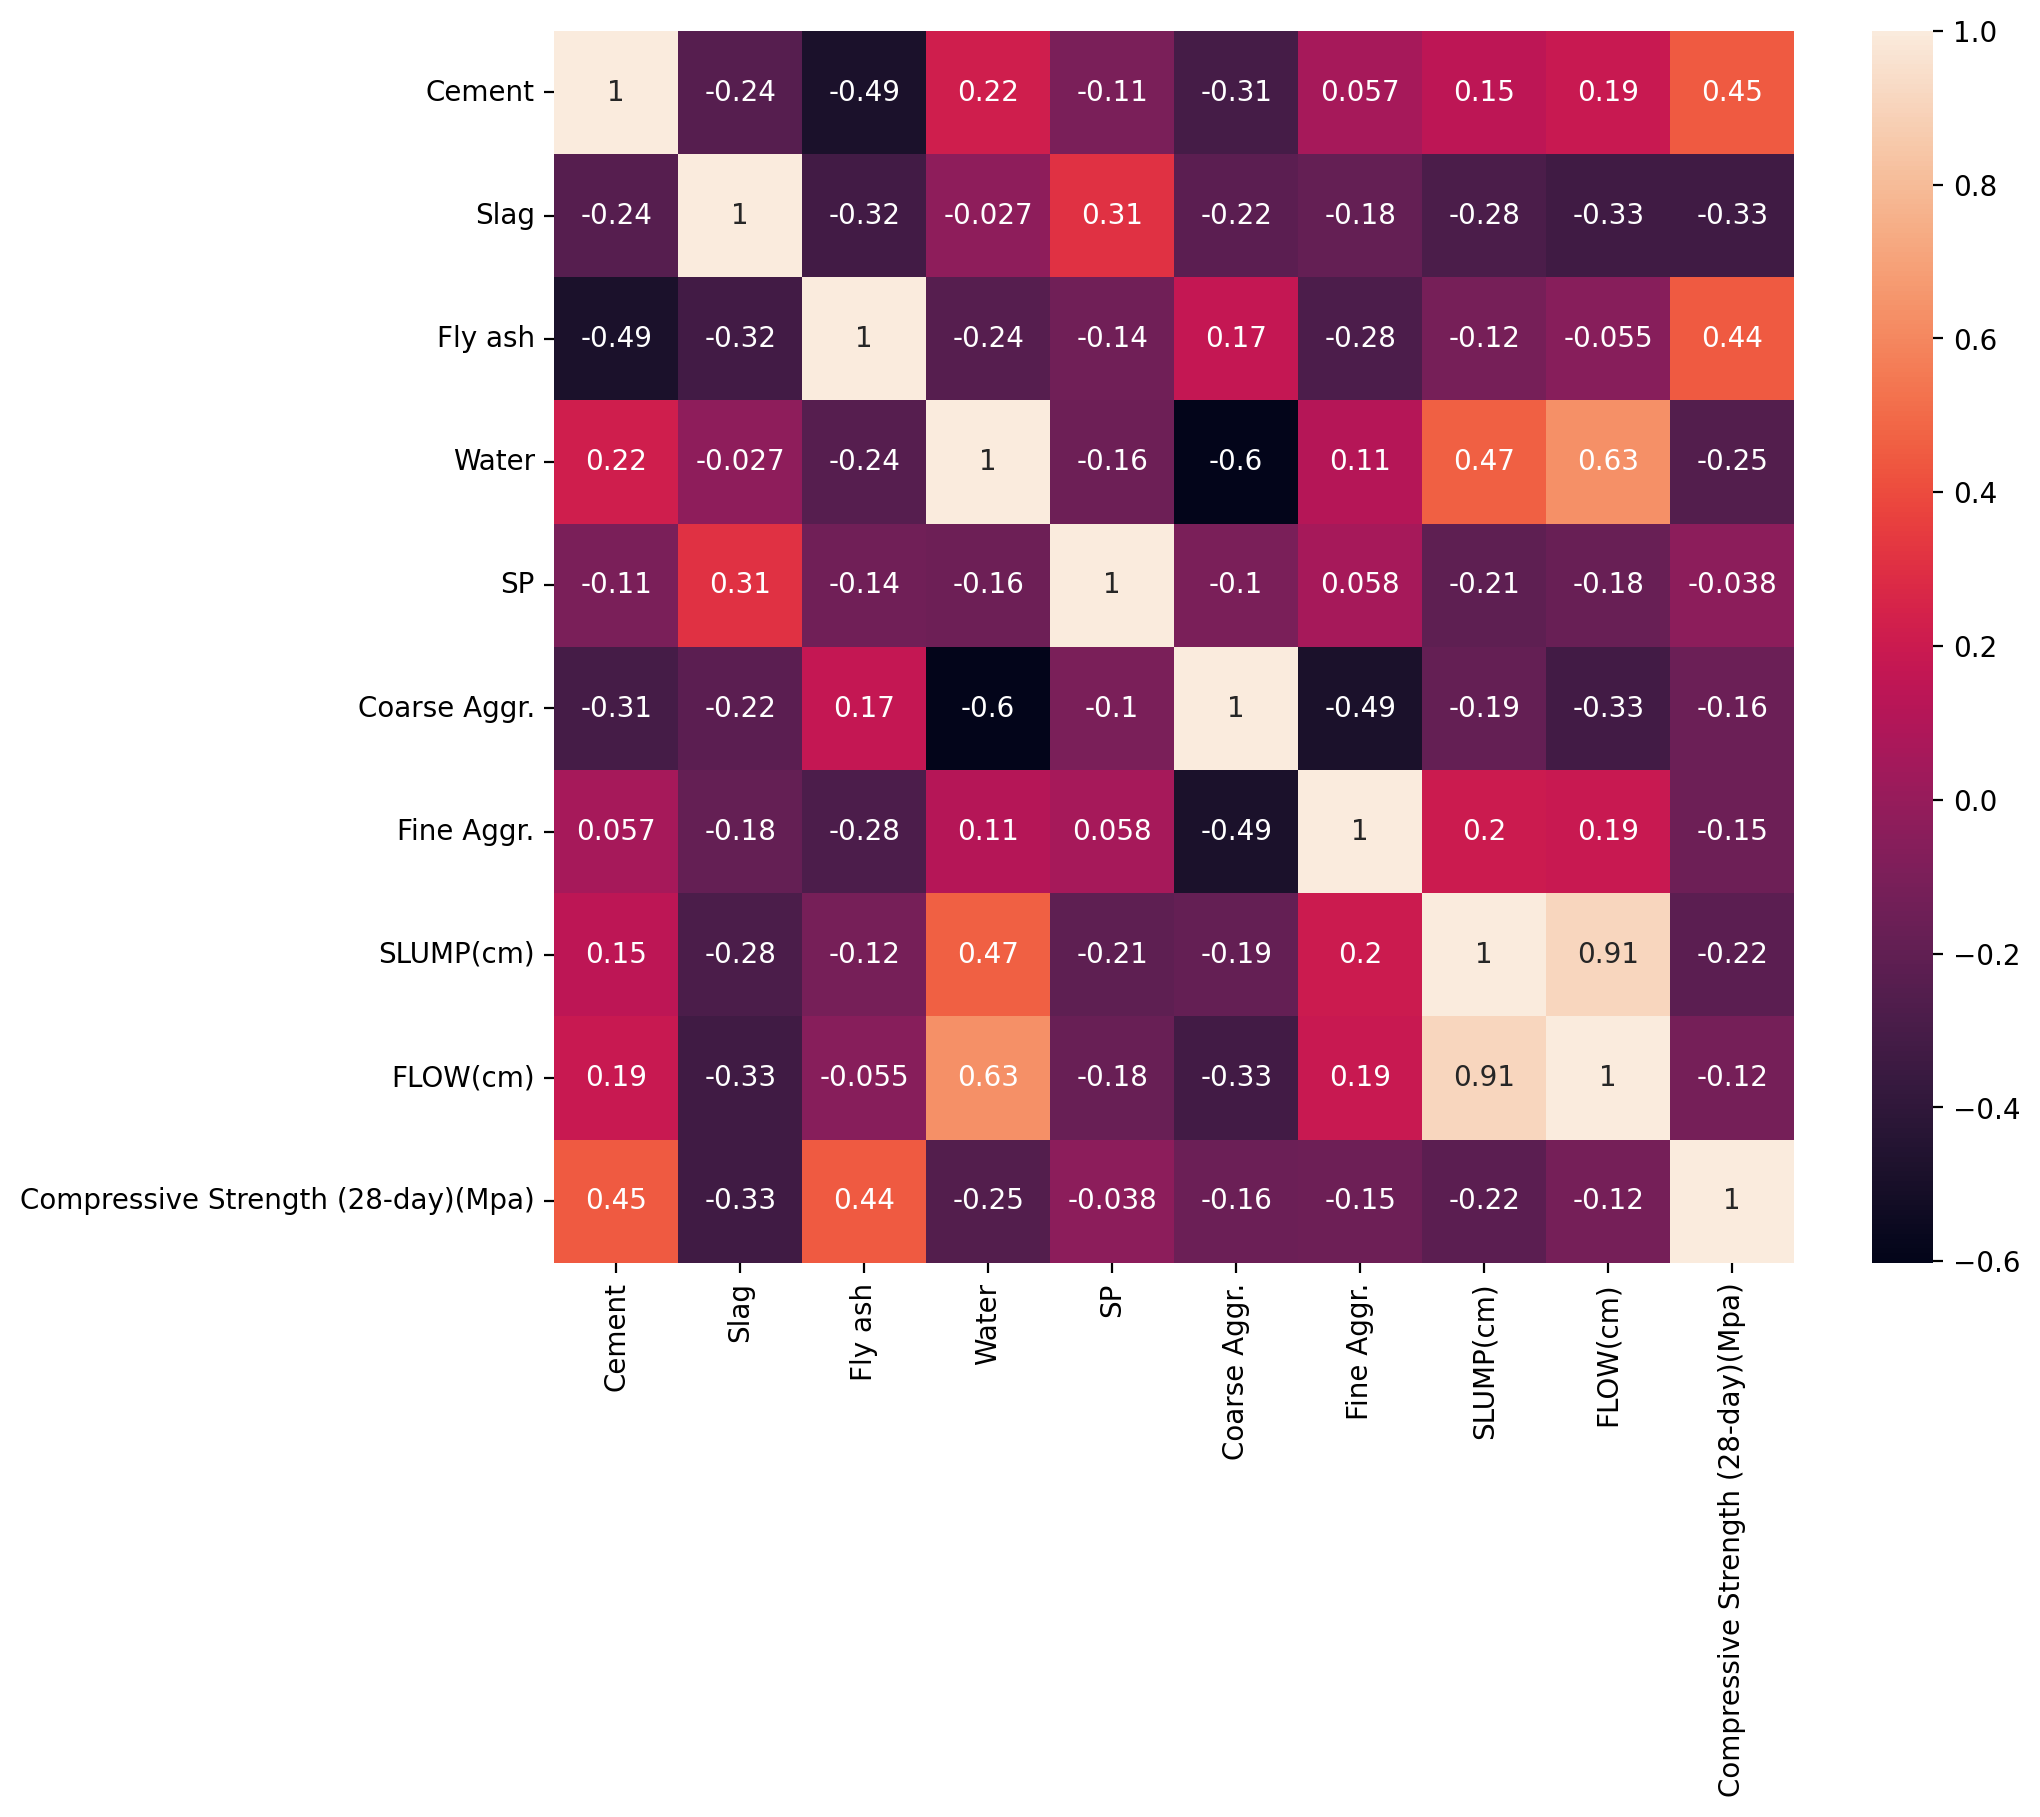

In [6]:
plt.figure(figsize = (10,8), dpi = 200)
sns.heatmap(data = df.corr(), annot = True)

In [26]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


No features with strong correlations present.

#### Scikit-Learn imports

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Data Split And Clean

In [8]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis = 1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
base_model = SVR()

In [14]:
base_model.fit(X_train, y_train)

SVR()

In [15]:
predictions  = base_model.predict(X_test)

In [16]:
mean_absolute_error(y_test, predictions)

5.236902091259178

In [17]:
np.sqrt(mean_squared_error(y_test, predictions))

6.695914838327133

This is very large and not that good since its a chunk of the range of values here

RANDOM FOREST
*italicized text*

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset
df = pd.read_csv('cement_slump.csv')

X = df[['Cement', 'Fly ash', 'SLUMP(cm)']]  # Example features
y = df['Compressive Strength (28-day)(Mpa)']  # Example target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune these parameters

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 11.91122498666663
R^2 Score: 0.7645873733077141


The R^2 is quite storng  here and MSE is much stronger  due to the correlation of fly ash very good!

#### Tuning model

In [18]:
parameter_grid = {"kernel" : ["linear", "rbf", "sigmoid", "poly"],
                 "C" : [0.01, 0.1, 0.5, 1], "gamma" : ["scale", "auto"],
                 "degree": [2,3,4], "epsilon": [0,0.01, 0.1, .5,1,2]}

In [19]:
model = GridSearchCV(base_model, param_grid= parameter_grid)

In [20]:
model.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [21]:
model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

Thees are the best paramters of SVR

#### Predictions and metrics

In [22]:
predictions = model.predict(X_test)

In [23]:
mean_absolute_error(y_test, predictions)

2.5128012210762365

In [24]:
np.sqrt(mean_squared_error(y_test, predictions))

3.178210305119858

This is a quite low RSME at 3.17 since there is a large variaton in the data set which means SVM was a good metric here to deterime how to predict better concrete longer lasting abilities

Overall the fly ash  is the strongeset feature to help determine if the concerte will continue to be strong in 28 days .